# Income prediction using Machine Learning

In this tutorial, we will explore developing machine learning models using Python. The data set that will be used is called UCI: Adult – Predict Income. This data set is meant to be used to predict whether an individual has an income of less than 50K or more than 50K based on census data.

## In this notebook

- Use multiple Python libraries, such as Pandas & scikit-learn
- Run data exploration
- Run data visualization
- Run data preparation
- Train models
- Evaluate models
- Save and load trained models

### 1. Environment Preparation

In [1]:
# Install packages

#!pip install pandas numpy matplotlib seaborn scikit-learn yellowbrick

In [2]:
# Import packages

import pandas as pd # working with data
import numpy as np # working with arrays
import matplotlib.pyplot as plt # data visualization
import seaborn as sb # data visualization

from sklearn.model_selection import train_test_split, KFold, cross_val_score # data spliting and k-cross validation

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

from yellowbrick.style import set_palette
from yellowbrick.classifier import ClassificationReport, ROCAUC, ConfusionMatrix, ClassPredictionError

import pickle # mode saving

C:\Users\jack\Anaconda3\lib\site-packages\numpy\_distributor_init.py:32: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\jack\Anaconda3\lib\site-packages\numpy\.libs\libopenblas.JPIJNSWNNAN3CE6LLI5FWSPHUT2VXMTH.gfortran-win_amd64.dll
C:\Users\jack\Anaconda3\lib\site-packages\numpy\.libs\libopenblas.XWYDX2IKJW2NMTWSFYNGFUWKQU3LYTCZ.gfortran-win_amd64.dll
  stacklevel=1)


### 2. Data Exploration 

In [3]:
# Load the data from the CSV to a Panda's Dataframe
adult_df = pd.read_csv(filepath_or_buffer='uci_adult_data.csv')

In [4]:
# Print information about the Panda Dataframe, including the number of records, number of columns, and data types
adult_df.info() # adult_df.dtypes will print the data types only

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education-num   32561 non-null  int64 
 5   marital-status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital-gain    32561 non-null  int64 
 11  capital-loss    32561 non-null  int64 
 12  hours-per-week  32561 non-null  int64 
 13  country         32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


<b><span style="color:red">Notes:</span></b>
- The fnlwgt column is the final weight indicating the number of people the census believes the entry represents
- The data has two columns representing the same thing (education and education-num) so we should use only one
- Reference for the data: https://archive.ics.uci.edu/ml/datasets/adult

In [5]:
# View some basic statistical details of the numeric columns
adult_df.describe()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [6]:
# View some basic statistical details of the non-numeric columns
adult_df.describe(include=['object'])

,workclass,education,marital-status,occupation,relationship,race,sex,country,income
count,32561,32561,32561,32561,32561,32561,32561,32561,32561
unique,9,16,7,15,6,5,2,42,2
top,Private,HS-grad,Married-civ-spouse,Prof-specialty,Husband,White,Male,United-States,<=50K
freq,22696,10501,14976,4140,13193,27816,21790,29170,24720


In [7]:
# Display the normalized counts of unique values of all non-numeric columns
from IPython.display import display_html
valcnt_df_html_stylers = []
for column in adult_df.select_dtypes(include=['object']):
    valcnt_df = pd.DataFrame(adult_df[column].value_counts(sort=True, normalize=True))
    valcnt_df_styler = valcnt_df.style.set_table_attributes("style='display:inline'").set_caption(column)
    valcnt_df_html_stylers.append(valcnt_df_styler._repr_html_())
display_html(''.join(valcnt_df_html_stylers), raw=True)

,workclass
Private,0.697030
Self-emp-not-inc,0.078038
Local-gov,0.064279
?,0.056386
State-gov,0.039864
Self-emp-inc,0.034274
Federal-gov,0.029483
Without-pay,0.000430
Never-worked,0.000215
,education


<b><span style="color:red">Note:</span></b> There are question marks <b>'?'</b> for an unknown values (in workclass, occupation, and country). Also, most of the records have the country as United-States. We can make the decision to <u>drop the records that have unknown values</u> and to <u>drop the country column</u>.

In [8]:
# Print some records from the beginning of the dataset
adult_df.head(n=20)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
5,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
6,49,Private,160187,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0,0,16,Jamaica,<=50K
7,52,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,>50K
8,31,Private,45781,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States,>50K
9,42,Private,159449,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178,0,40,United-States,>50K


In [9]:
# Print some records from the end of the dataset
adult_df.tail()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,country,income
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K
32560,52,Self-emp-inc,287927,HS-grad,9,Married-civ-spouse,Exec-managerial,Wife,White,Female,15024,0,40,United-States,>50K


### 3. Data Visualization

Seaborn will be used to create plots in order to visualize the dataset. With Seaborn, many different types of plots can be created. To browse the available visualization types, visit the Seaborn gallery at https://seaborn.pydata.org/examples/index.html.

In [10]:
# Set the Seaborn plot theme
sb.set(style = "darkgrid") 

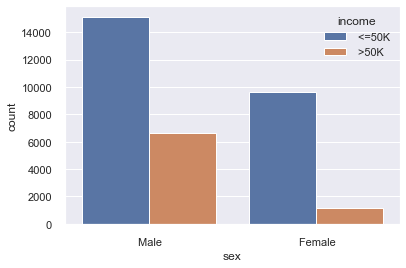

In [11]:
# Create a count plot
sb.countplot(x='sex', hue='income', data=adult_df)
plt.show()

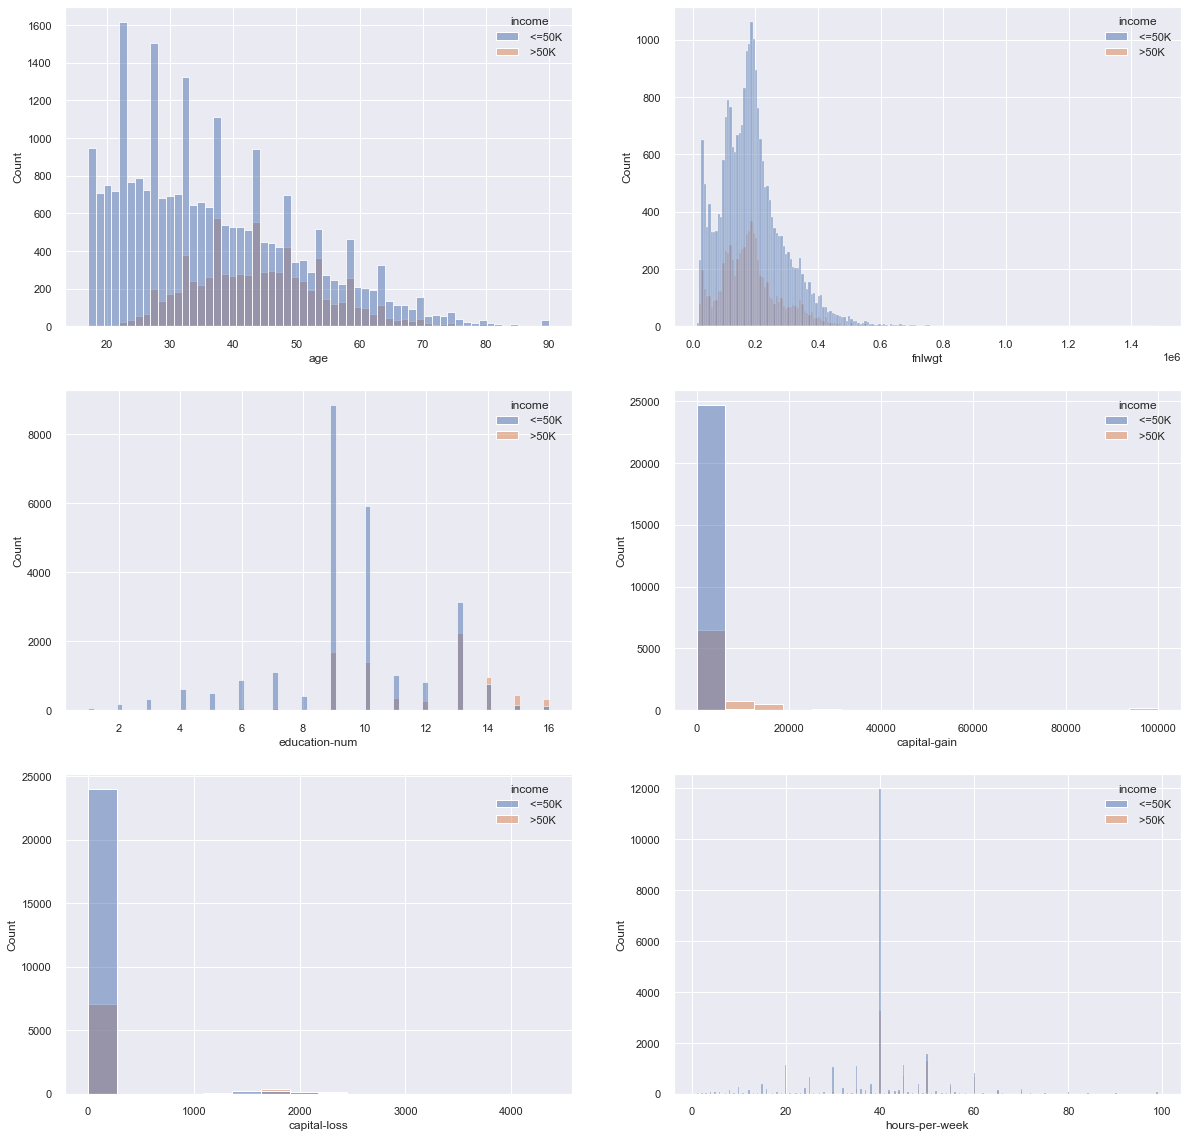

In [12]:
# Create histogram plots to show numeric feature distributions across target feature
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(20,20))
axes = axes.flatten()
index = 0
for column in adult_df.select_dtypes(include=['int64']):
    sb.histplot(x=column, hue="income", data=adult_df, ax=axes[index])
    index+=1

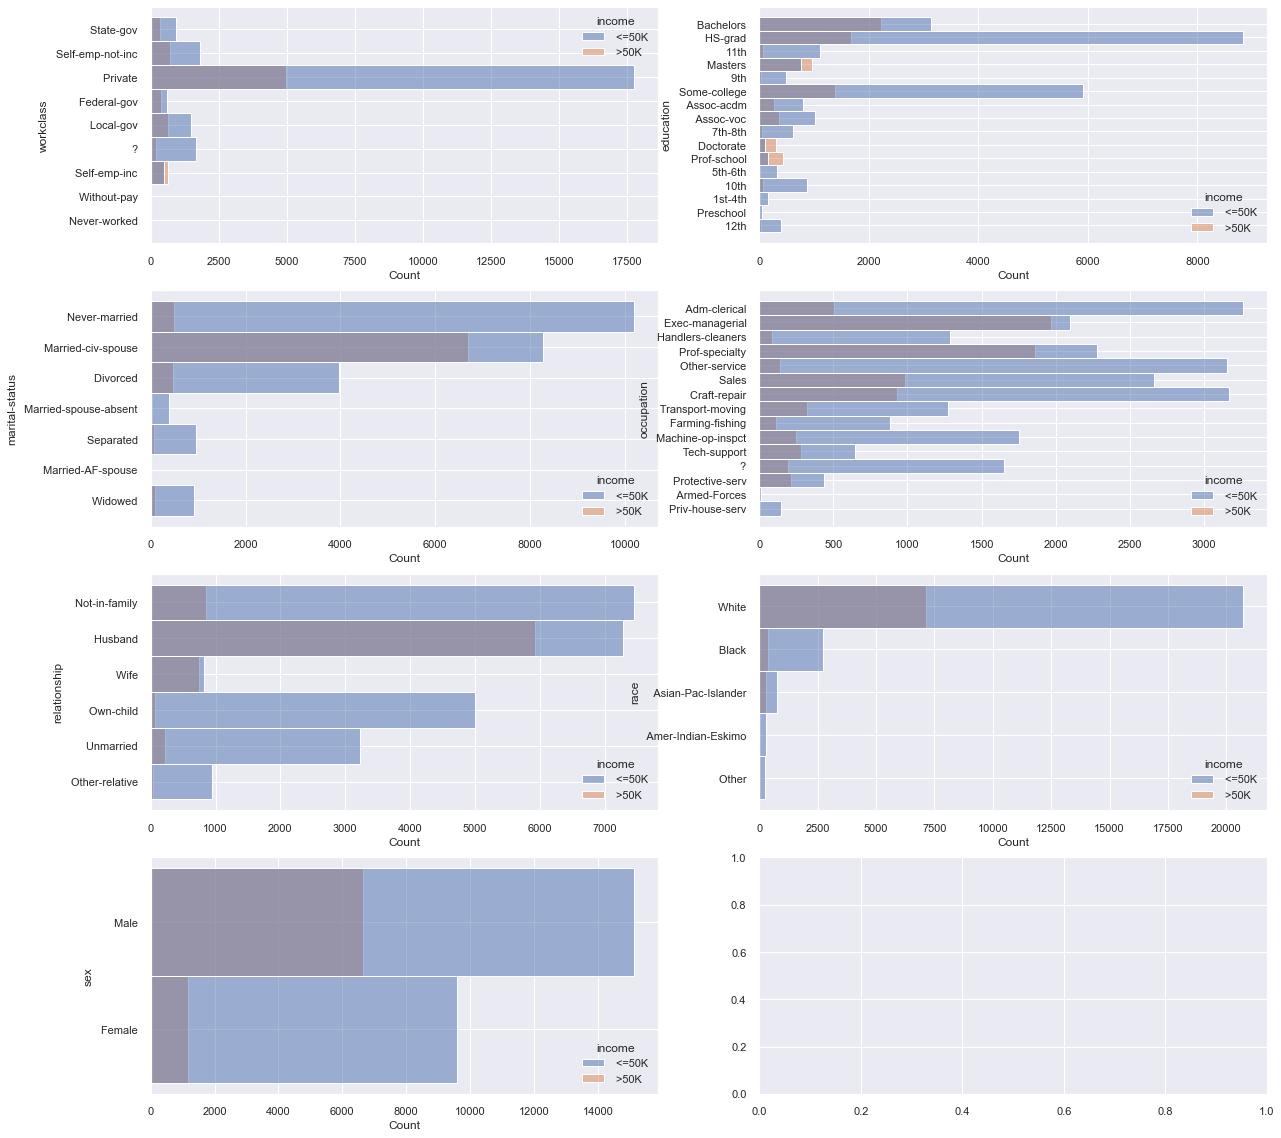

In [13]:
# Create histogram plots to show non-numeric feature distributions across target feature
fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(20,20))
axes = axes.flatten()
index = 0
for column in adult_df.select_dtypes(include=['object']):
    if(column not in ['income', 'country']):
        sb.histplot(y=column, hue="income", data=adult_df, ax=axes[index])
        index+=1

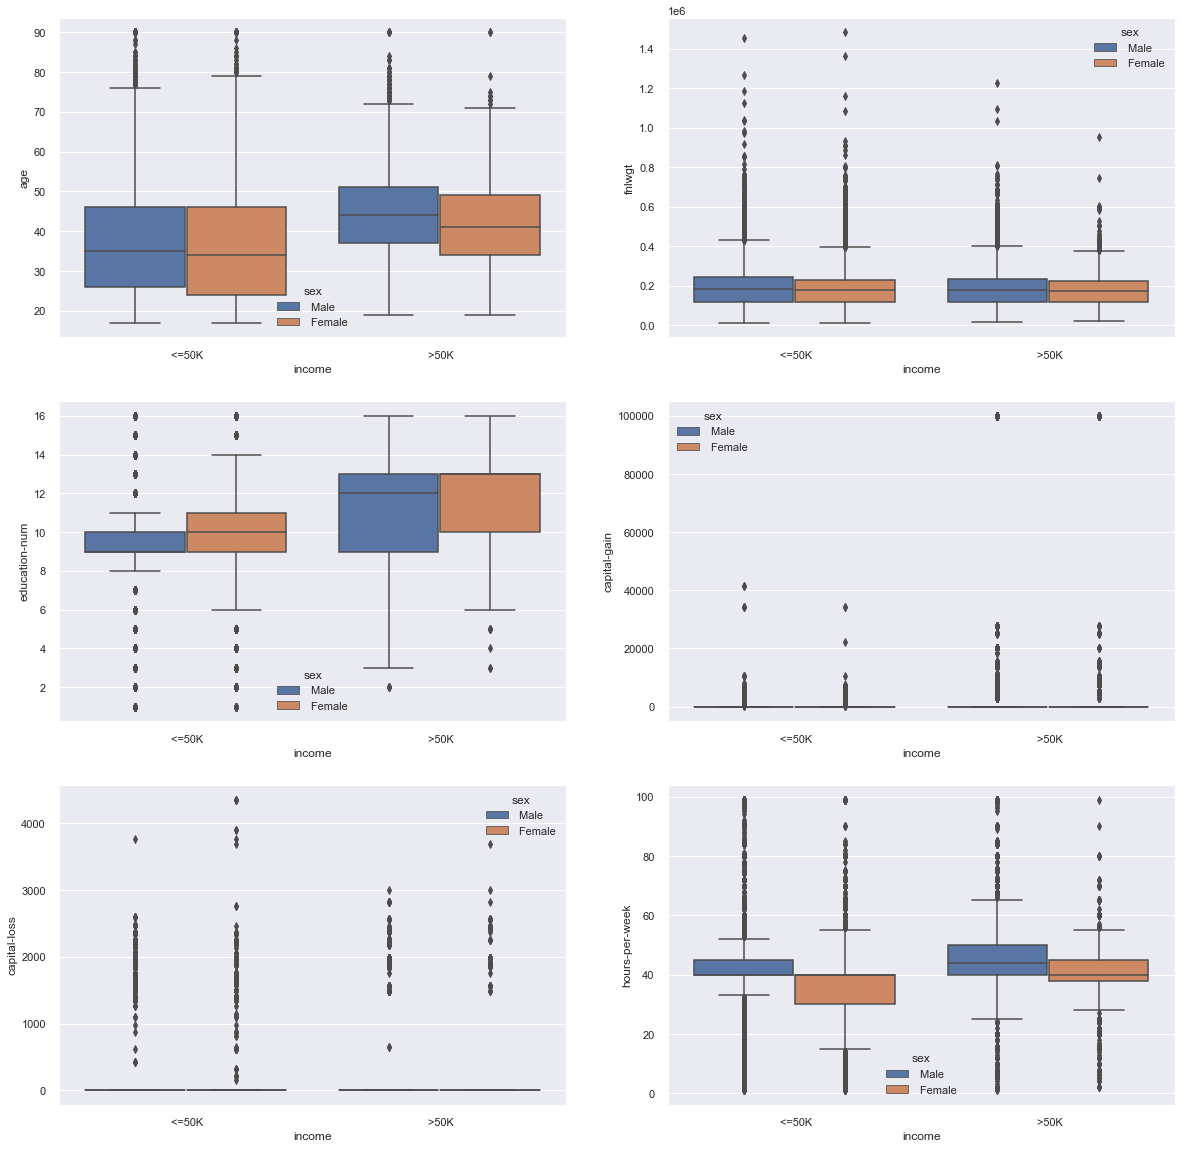

In [14]:
# Create box plots to show numeric feature distributions across target feature and for example the sex column
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(20,20))
axes = axes.flatten()
index = 0
for column in adult_df.select_dtypes(include=['int64']):
    sb.boxplot(y=column, x="income", hue="sex", data=adult_df, ax=axes[index])
    index+=1

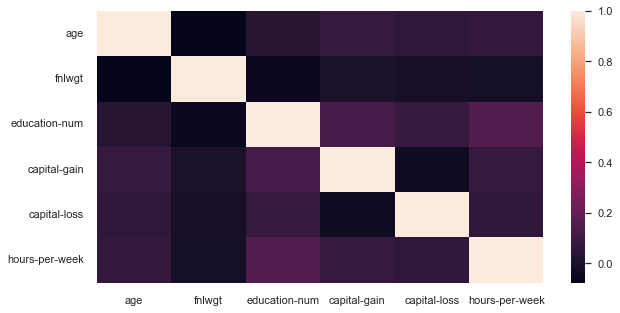

In [15]:
# Create a heatmap showing the correlation between columns  
corr_matrix = adult_df.corr()
fig, ax = plt.subplots(figsize=(10, 5))
sb.heatmap(corr_matrix, annot=False, ax=ax)
plt.show()

### 4. Data Preparation

1. From our data exploration, we noticed some unkown values in some of the features (workclass, occupation, and country) as well a highly unblanaced feature (country), so let us remove the country column first and then remove the records with unknown values. We should also drop either the education or education-num column to remove the redundancy.

In [16]:
# Drop the country and education-num columns
adult_df.drop(['country', 'education-num'], axis=1, inplace=True)

In [17]:
# Mark '?' values as missing or NaN (check the data file to see if there is a space before the question mark)
adult_df['workclass'] = adult_df['workclass'].replace(' ?', np.NaN)
adult_df['occupation'] = adult_df['occupation'].replace(' ?', np.NaN)

# Drop rows with missing values
adult_df.dropna(inplace=True)

# Check that there are no more unknown or missing values
#[adult_df['workclass'].value_counts(), adult_df['occupation'].value_counts()]
display_html(pd.DataFrame(adult_df['workclass'].value_counts()).style.set_table_attributes("style='display:inline'")._repr_html_() + 
             pd.DataFrame(adult_df['occupation'].value_counts()).style.set_table_attributes("style='display:inline'")._repr_html_(),
             raw=True)

,workclass
Private,22696
Self-emp-not-inc,2541
Local-gov,2093
State-gov,1298
Self-emp-inc,1116
Federal-gov,960
Without-pay,14
,occupation
Prof-specialty,4140
Craft-repair,4099


2. Depending on the machine learning models we will use, we need to figure out what to do with the different feature types (numerical or categorical). We have three options:
    - 1) convert all features to numerical (one-hot encoding, label encoding, or other methods),
    - 2) covert all features to categorical (binning or other methods), or
    - 3) keep both numerical and categorical features as they are but this will limit the ML models that can be used.
    
   Since most machine learning models work with numerical features, we will convert the categorical columns (those of type Object) to numerical columns.

In [18]:
# Convert all String values to lowercase
string_columns = ['workclass', 'education', 'marital-status', 'occupation', 'relationship', 'race', 'sex', 'income']

for col in string_columns:
    adult_df[col] = adult_df[col].map(lambda x: x.lower())

# Check that the Object column values are now lowercase
adult_df.head()

,age,workclass,fnlwgt,education,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,income
0,39,state-gov,77516,bachelors,never-married,adm-clerical,not-in-family,white,male,2174,0,40,<=50k
1,50,self-emp-not-inc,83311,bachelors,married-civ-spouse,exec-managerial,husband,white,male,0,0,13,<=50k
2,38,private,215646,hs-grad,divorced,handlers-cleaners,not-in-family,white,male,0,0,40,<=50k
3,53,private,234721,11th,married-civ-spouse,handlers-cleaners,husband,black,male,0,0,40,<=50k
4,28,private,338409,bachelors,married-civ-spouse,prof-specialty,wife,black,female,0,0,40,<=50k


In [19]:
# Convert the non-numeric columns to numeric using one hot encoding and concatenate the new columns with the original Dataframe
all_numeric_df = pd.concat([adult_df, pd.get_dummies(adult_df[string_columns], prefix=string_columns, drop_first=True)], axis=1)
all_numeric_df.head()

,age,workclass,fnlwgt,education,marital-status,occupation,relationship,race,sex,capital-gain,...,relationship_ other-relative,relationship_ own-child,relationship_ unmarried,relationship_ wife,race_ asian-pac-islander,race_ black,race_ other,race_ white,sex_ male,income_ >50k
0,39,state-gov,77516,bachelors,never-married,adm-clerical,not-in-family,white,male,2174,...,0,0,0,0,0,0,0,1,1,0
1,50,self-emp-not-inc,83311,bachelors,married-civ-spouse,exec-managerial,husband,white,male,0,...,0,0,0,0,0,0,0,1,1,0
2,38,private,215646,hs-grad,divorced,handlers-cleaners,not-in-family,white,male,0,...,0,0,0,0,0,0,0,1,1,0
3,53,private,234721,11th,married-civ-spouse,handlers-cleaners,husband,black,male,0,...,0,0,0,0,0,1,0,0,1,0
4,28,private,338409,bachelors,married-civ-spouse,prof-specialty,wife,black,female,0,...,0,0,0,1,0,1,0,0,0,0


In [20]:
# Check that we now have extra columns for each unique value of the categorical fields
all_numeric_df.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'marital-status',
       'occupation', 'relationship', 'race', 'sex', 'capital-gain',
       'capital-loss', 'hours-per-week', 'income', 'workclass_ local-gov',
       'workclass_ private', 'workclass_ self-emp-inc',
       'workclass_ self-emp-not-inc', 'workclass_ state-gov',
       'workclass_ without-pay', 'education_ 11th', 'education_ 12th',
       'education_ 1st-4th', 'education_ 5th-6th', 'education_ 7th-8th',
       'education_ 9th', 'education_ assoc-acdm', 'education_ assoc-voc',
       'education_ bachelors', 'education_ doctorate', 'education_ hs-grad',
       'education_ masters', 'education_ preschool', 'education_ prof-school',
       'education_ some-college', 'marital-status_ married-af-spouse',
       'marital-status_ married-civ-spouse',
       'marital-status_ married-spouse-absent',
       'marital-status_ never-married', 'marital-status_ separated',
       'marital-status_ widowed', 'occupation_ armed-forces',
  

In [21]:
# Check the types of the new columns
all_numeric_df.dtypes

age                int64
workclass         object
fnlwgt             int64
education         object
marital-status    object
                   ...  
race_ black        uint8
race_ other        uint8
race_ white        uint8
sex_ male          uint8
income_ >50k       uint8
Length: 64, dtype: object

In [22]:
# Now drop the original String columns
all_numeric_df.drop(string_columns, axis=1, inplace=True)

In [23]:
# Check that all the features left are numeric
all_numeric_df.dtypes

age                                      int64
fnlwgt                                   int64
capital-gain                             int64
capital-loss                             int64
hours-per-week                           int64
workclass_ local-gov                     uint8
workclass_ private                       uint8
workclass_ self-emp-inc                  uint8
workclass_ self-emp-not-inc              uint8
workclass_ state-gov                     uint8
workclass_ without-pay                   uint8
education_ 11th                          uint8
education_ 12th                          uint8
education_ 1st-4th                       uint8
education_ 5th-6th                       uint8
education_ 7th-8th                       uint8
education_ 9th                           uint8
education_ assoc-acdm                    uint8
education_ assoc-voc                     uint8
education_ bachelors                     uint8
education_ doctorate                     uint8
education_ hs

### 5. Training Set & Test Set

In [24]:
# Separate the data into feature and target variables
numeric_features_df = all_numeric_df.loc[:, all_numeric_df.columns != 'income_ >50k']
target = all_numeric_df['income_ >50k']

numeric_features_df

,age,fnlwgt,capital-gain,capital-loss,hours-per-week,workclass_ local-gov,workclass_ private,workclass_ self-emp-inc,workclass_ self-emp-not-inc,workclass_ state-gov,...,relationship_ not-in-family,relationship_ other-relative,relationship_ own-child,relationship_ unmarried,relationship_ wife,race_ asian-pac-islander,race_ black,race_ other,race_ white,sex_ male
0,39,77516,2174,0,40,0,0,0,0,1,...,1,0,0,0,0,0,0,0,1,1
1,50,83311,0,0,13,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,1
2,38,215646,0,0,40,0,1,0,0,0,...,1,0,0,0,0,0,0,0,1,1
3,53,234721,0,0,40,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,1
4,28,338409,0,0,40,0,1,0,0,0,...,0,0,0,0,1,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,257302,0,0,38,0,1,0,0,0,...,0,0,0,0,1,0,0,0,1,0
32557,40,154374,0,0,40,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,1
32558,58,151910,0,0,40,0,1,0,0,0,...,0,0,0,1,0,0,0,0,1,0
32559,22,201490,0,0,20,0,1,0,0,0,...,0,0,1,0,0,0,0,0,1,1


In [25]:
# Split the dataset into training (80%) and testing (20%) sets
X_train, X_test, y_train, y_test = train_test_split(numeric_features_df, target, test_size=0.2, random_state=10)

# Split the training set into training (80%) and validation (20%) sets
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=5)

print ("Train dataset: {0}{1}".format(X_train.shape, y_train.shape))
print ("Validation dataset: {0}{1}".format(X_val.shape, y_val.shape))
print ("Test dataset: {0}{1}".format(X_test.shape, y_test.shape))

Train dataset: (19659, 55)(19659,)
Validation dataset: (4915, 55)(4915,)
Test dataset: (6144, 55)(6144,)


### 6. Building Models

In [26]:
# Let's select a few algorithms for classification
model_names = ['LR', 'KNN', 'GaussianNB', 'DecisionTreeClassifier', 'RandomForest']
models = []

models.append((LogisticRegression(solver='lbfgs', max_iter=200)))
models.append((KNeighborsClassifier(n_neighbors=3)))
models.append((GaussianNB()))
models.append((DecisionTreeClassifier()))
models.append((RandomForestClassifier(n_estimators=10)))

In [27]:
# Run K-Cross Validation to build the models and find the one with the highest accuracy
# Also print some evaluation metrics
kfold = KFold(n_splits=10)

for i in range(0, len(models)):
    cv_result = cross_val_score(models[i], X_train, y_train, cv=kfold, scoring='accuracy')
    print ('-'*40)
    print ('{0}[Internal Validation Accuracy Scores]: {1}, {2}'.format(model_names[i], cv_result, round(cv_result.mean(), 5)))
    
    # cross_val_score() does not change your estimator (model) so it does not return the trained model
    # It only returns the cross validation scores
    models[i].fit(X_train, y_train)
    
    prediction = models[i].predict(X_val)
    acc_score = accuracy_score(y_val, prediction)     
    print ('{0}[External Validation Accuracy Score]: {1}'.format(model_names[i], round(acc_score, 5)))
   
    prediction = models[i].predict(X_test)
    acc_score = accuracy_score(y_test, prediction)     
    print ('{0}[Test Accuracy Score]: {1}'.format(model_names[i], round(acc_score, 5)))
    print ('{0}[Test Confusion Matrix]:\n{1}'.format(model_names[i], confusion_matrix(y_test, prediction)))
    print ('{0}[Test Classification Matrix]:\n{1}'.format(model_names[i], classification_report(y_test, prediction)))

----------------------------------------
LR[Internal Validation Accuracy Scores]: [0.80671414 0.79603255 0.79501526 0.78738555 0.79247202 0.7965412
 0.78585961 0.80315361 0.79094608 0.7821883 ], 0.79363
LR[External Validation Accuracy Score]: 0.78983
LR[Test Accuracy Score]: 0.78467
LR[Test Confusion Matrix]:
[[4428  167]
 [1156  393]]
LR[Test Classification Matrix]:
              precision    recall  f1-score   support

           0       0.79      0.96      0.87      4595
           1       0.70      0.25      0.37      1549

    accuracy                           0.78      6144
   macro avg       0.75      0.61      0.62      6144
weighted avg       0.77      0.78      0.74      6144

----------------------------------------
KNN[Internal Validation Accuracy Scores]: [0.76449644 0.75025432 0.74618515 0.73957274 0.75788403 0.7629705
 0.72380468 0.75991862 0.75178026 0.74656489], 0.75034
KNN[External Validation Accuracy Score]: 0.73876
KNN[Test Accuracy Score]: 0.74561
KNN[Test Confusi

In [28]:
# Keep the best model
randomForestModel = models[4]

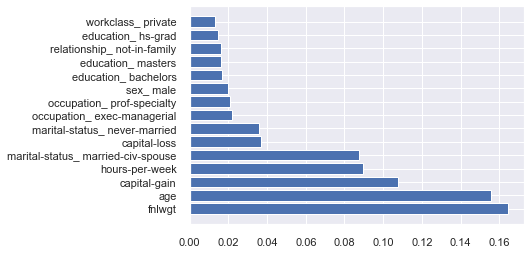

In [29]:
# The Random Forest algorithm automatically computes feature importance values
importance = randomForestModel.feature_importances_
sorted_idx = importance.argsort()[::-1][:15] # top 15 important features
plt.barh(y=numeric_features_df.columns[sorted_idx], width=importance[sorted_idx])
plt.show()

<b><span style="color:red">Note:</span></b> Yellowbrick is an extension of the Scikit-Learn library that can be used for machine learning-related visualizations.

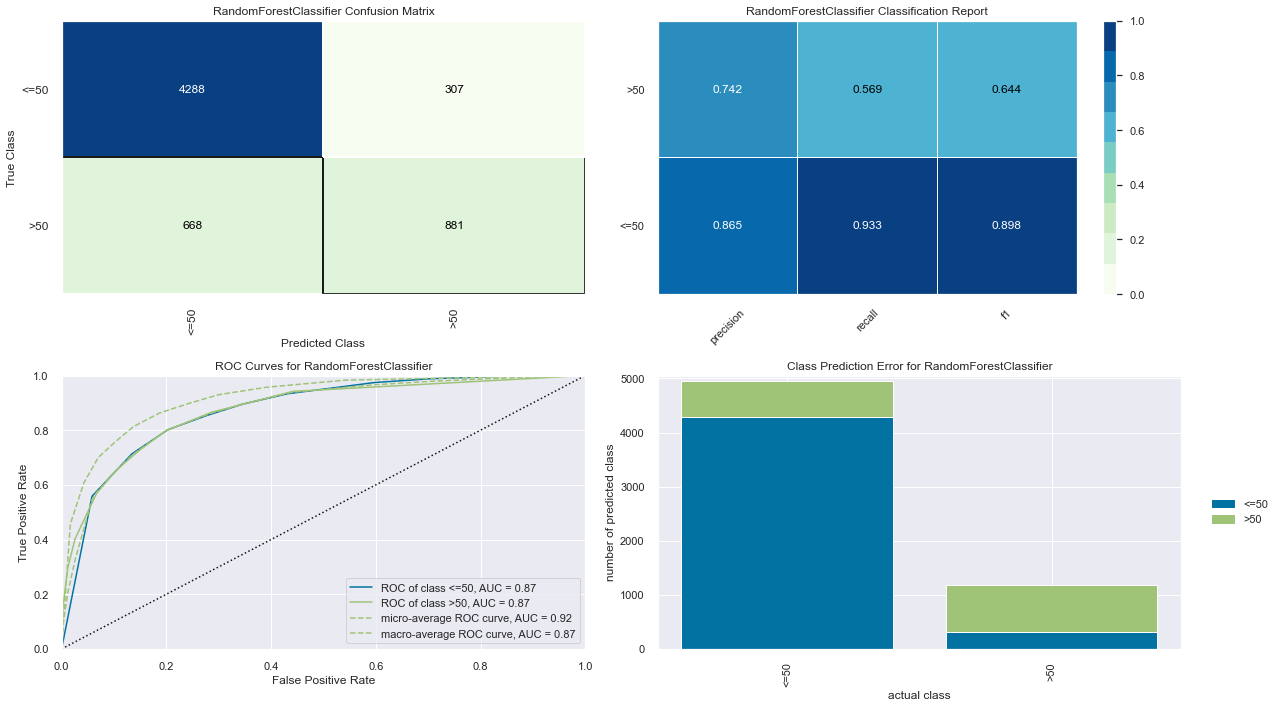

In [30]:
# Use Yellowbrick to generate visual representations of some model performance metrics
set_palette('yellowbrick')
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(20,10))
axes = axes.flatten()

classes = ['<=50','>50']
visualgrid = [
    ConfusionMatrix(randomForestModel, classes=classes, cmap='GnBu', ax=axes[0]),
    ClassificationReport(randomForestModel, classes=classes, cmap='GnBu', ax=axes[1]),
    ROCAUC(randomForestModel, classes=classes, ax=axes[2]),
    ClassPredictionError(randomForestModel, classes=classes, ax=axes[3]),
]

for viz in visualgrid:
    viz.fit(X_train, y_train)
    viz.score(X_test, y_test)
    viz.finalize()

plt.show()

### 7. Saving the trained model

In [31]:
# Save the Random Forest model to disk using the pickle library
filename = 'finalized_randomForestModel.mdl'
pickle.dump(randomForestModel, open(filename, 'wb'))

### 8. Loading the model later

In [32]:
# load the model from disk
filename = 'finalized_randomForestModel.mdl'
loaded_model = pickle.load(open(filename, 'rb'))
loaded_model_prediction = loaded_model.predict(X_test)
print ('-'*40)
print ('Test Accuracy score:')
print (accuracy_score(y_test, loaded_model_prediction))
print ('-'*40)
print ('Test Confusion Matrix:')
print (confusion_matrix(y_test, loaded_model_prediction))
print ('-'*40)
print ('Test Classification Matrix:')
print (classification_report(y_test, loaded_model_prediction))

----------------------------------------
Test Accuracy score:
0.84130859375
----------------------------------------
Test Confusion Matrix:
[[4288  307]
 [ 668  881]]
----------------------------------------
Test Classification Matrix:
              precision    recall  f1-score   support

           0       0.87      0.93      0.90      4595
           1       0.74      0.57      0.64      1549

    accuracy                           0.84      6144
   macro avg       0.80      0.75      0.77      6144
weighted avg       0.83      0.84      0.83      6144



## Summary

What we have done in this notebook:

- Used multiple Python libraries, such as Pandas & scikit-learn
- Ran data exploration
- Ran data visualization
- Ran data preparation
- Trained models
- Evaluated models
- Saved and loaded trained models
 

## Practice Activities

1. We converted the categorical features to numerical features. Try doing it the other way around -- convert the numerical features to categorical features. One way to do this is a method called binning. Note that some of the models we used might not work with categorical features.

In [33]:
# Example of binning using KBinsDiscretizer

from sklearn import preprocessing

# Create an instance of the KBinsDiscretizer Object
bd = preprocessing.KBinsDiscretizer(n_bins=10, encode='ordinal', strategy='uniform')

# Bin continuous data into intervals and print the result
adult_df['age_bin'] = bd.fit_transform([[x] for x in adult_df['age']])

display(adult_df)

,age,workclass,fnlwgt,education,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,income,age_bin
0,39,state-gov,77516,bachelors,never-married,adm-clerical,not-in-family,white,male,2174,0,40,<=50k,3.0
1,50,self-emp-not-inc,83311,bachelors,married-civ-spouse,exec-managerial,husband,white,male,0,0,13,<=50k,4.0
2,38,private,215646,hs-grad,divorced,handlers-cleaners,not-in-family,white,male,0,0,40,<=50k,2.0
3,53,private,234721,11th,married-civ-spouse,handlers-cleaners,husband,black,male,0,0,40,<=50k,4.0
4,28,private,338409,bachelors,married-civ-spouse,prof-specialty,wife,black,female,0,0,40,<=50k,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,private,257302,assoc-acdm,married-civ-spouse,tech-support,wife,white,female,0,0,38,<=50k,1.0
32557,40,private,154374,hs-grad,married-civ-spouse,machine-op-inspct,husband,white,male,0,0,40,>50k,3.0
32558,58,private,151910,hs-grad,widowed,adm-clerical,unmarried,white,female,0,0,40,<=50k,5.0
32559,22,private,201490,hs-grad,never-married,adm-clerical,own-child,white,male,0,0,20,<=50k,0.0


2. We used one-hot encoding to convert the categorical features to numerical features. You can try a different method called label encoding, which assigns a number to each unique value in a categorical feature.

In [34]:
# Example of label encoding

from sklearn.preprocessing import LabelEncoder

adult_df['occupation-labelencoded'] = LabelEncoder().fit_transform(adult_df['occupation'])

display(adult_df)

,age,workclass,fnlwgt,education,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,income,age_bin,occupation-labelencoded
0,39,state-gov,77516,bachelors,never-married,adm-clerical,not-in-family,white,male,2174,0,40,<=50k,3.0,0
1,50,self-emp-not-inc,83311,bachelors,married-civ-spouse,exec-managerial,husband,white,male,0,0,13,<=50k,4.0,3
2,38,private,215646,hs-grad,divorced,handlers-cleaners,not-in-family,white,male,0,0,40,<=50k,2.0,5
3,53,private,234721,11th,married-civ-spouse,handlers-cleaners,husband,black,male,0,0,40,<=50k,4.0,5
4,28,private,338409,bachelors,married-civ-spouse,prof-specialty,wife,black,female,0,0,40,<=50k,1.0,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,private,257302,assoc-acdm,married-civ-spouse,tech-support,wife,white,female,0,0,38,<=50k,1.0,12
32557,40,private,154374,hs-grad,married-civ-spouse,machine-op-inspct,husband,white,male,0,0,40,>50k,3.0,6
32558,58,private,151910,hs-grad,widowed,adm-clerical,unmarried,white,female,0,0,40,<=50k,5.0,0
32559,22,private,201490,hs-grad,never-married,adm-clerical,own-child,white,male,0,0,20,<=50k,0.0,0
